# Análisis de campañas de alivio financiero y propuesta para recuperación de cartera vencida en una entidad financiera

## Breve descripción del proyecto

En el presente proyecto, se realiza el análisis de los datos correspondientes a una campaña que realiza la entidad financiera, a la cual se la referirá mediante el nombre ficticio ***Mi Banco Feliz***, cuyo objetivo es lanzar 2 campañas en pro de sus clientes en estado de mora a fin de recuperar más de un 60% de la cartera vencida que se mantiene con corte a la fecha de este proyecto, es decir, Junio de 2025.

Se realiza este análisis debido a que las campañas de alivio financiero, llamadas diferimiento y normalización, han tenido baja efectividad en cuanto a recuperación monetaria frente a las metas previamente establecidas por el departamento de cobranzas de la Entidad.

Se van a responder a las siguientes preguntas para poder entender de mejor manera cuál es el problema actual y de que manera se podría brindar una solución que satizfaga tanto las necesidades del Banco sin descuidar el bienestar del cliente:

1. ¿Qué perfiles de clientes están siendo atendidos por cada campaña y canal?
2. ¿Cómo podría optimizarse el enfoque actual para mejorar la efectividad de las campañas?

**Nota:** *A lo largo del presente reporte se analizan datos reales, mismos que han sido debidamente ofuscados y/o omitidos intencionalmente con el fin de proteger posible información sensible, así como por mantener respeto y apego hacia las leyes de protección de datos tanto locales como internacionales.*

## Carga del conjunto de datos en Pandas

Se importa la librería *pandas*, se carga el dataset y se muestran sus parámetros descriptivos incluyendo sus primeras filas, información general de tipos de datos, evaluación inicial de valores nulos, así como estadísticas descriptivas preliminares que otorga esta librería.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_morosidad = pd.read_csv("df_morosidad.csv")

## Limpieza y preprocesamiento de la información

En este análisis se va a revisar la calidad y consistencia de la información de entrada, incluyendo la posible existencia de valores nulos o en blanco, datos atípicos, entre otros.

In [3]:
df_morosidad.head()

,codigo_cliente,rango_morosidad,monto_credito,monto_por_vencer,monto_vencido,intereses,producto_host,dias_mora,gestor,recibe_sueldo_fijo,provincia_cliente,region,sector_general
0,DNI-9502992,31 - 60 DIAS,8045.23,5686.38,0.00,143.94,PRECISO,36,RED COMERCIAL,SÍ,PICHINCHA,SIERRA,SECTOR PÚBLICO
1,DNI-5110681,16 - 30 DIAS,5924.60,0.00,92.60,98.97,PRECISO,22,DIGITAL,NO,PICHINCHA,SIERRA,TRANSPORTE Y LOGÍSTICA
2,DNI-6527606,6 - 15 DIAS,5125.55,0.00,74.08,148.94,PRECISO,10,DIGITAL,NO,GUAYAS,COSTA,COMERCIO
3,DNI-5095519,16 - 30 DIAS,4848.91,0.00,142.72,65.76,PRECISO,23,DIGITAL,NO,PICHINCHA,SIERRA,COMERCIO
4,DNI-9856629,16 - 30 DIAS,6621.77,5462.92,0.00,127.39,PRECISO,28,RED COMERCIAL,NO,PICHINCHA,SIERRA,SERVICIOS


In [4]:
df_morosidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   codigo_cliente      4115 non-null   object 
 1   rango_morosidad     4115 non-null   object 
 2   monto_credito       4115 non-null   float64
 3   monto_por_vencer    4115 non-null   float64
 4   monto_vencido       4115 non-null   float64
 5   intereses           4115 non-null   float64
 6   producto_host       4115 non-null   object 
 7   dias_mora           4115 non-null   int64  
 8   gestor              4115 non-null   object 
 9   recibe_sueldo_fijo  4115 non-null   object 
 10  provincia_cliente   4090 non-null   object 
 11  region              4115 non-null   object 
 12  sector_general      4115 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 418.1+ KB


In [5]:
df_morosidad.describe()

,monto_credito,monto_por_vencer,monto_vencido,intereses,dias_mora
count,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000
mean,9889.804168,3742.993896,62.615878,165.204522,26.249332
std,11221.651826,7083.584846,135.121374,181.270760,13.370148
min,1124.280000,0.000000,0.000000,9.210000,10.000000
25%,4401.505000,0.000000,0.000000,60.200000,15.000000
50%,7072.150000,1493.760000,0.000000,113.110000,23.000000
75%,11161.935000,5186.860000,90.080000,204.440000,35.000000
max,209131.960000,138940.420000,3322.440000,2439.470000,60.000000


### Verificación de posibles valores blancos o nulos

In [6]:
df_morosidad.isna().sum()

codigo_cliente         0
rango_morosidad        0
monto_credito          0
monto_por_vencer       0
monto_vencido          0
intereses              0
producto_host          0
dias_mora              0
gestor                 0
recibe_sueldo_fijo     0
provincia_cliente     25
region                 0
sector_general         0
dtype: int64

In [7]:
df_morosidad["provincia_cliente"].isna().sum()/len(df_morosidad) * 100

0.6075334143377886

Se puede ver en la celda anterior que de manera preliminar únicamente existen valores nulos en la variable *provincia_cliente* dentro del presente conjunto de datos, por lo cual al representar a penas el 0.61% de los datos se procede con su respectiva elimincación. Adicionalmente y para las demás columnas o variables se verifica si hay valores nulos según el contexto del negocio así como valores inconsistentes.

#### Eliminación de valores nulos preliminares

In [8]:
df_morosidad.dropna(inplace=True)

### Verificación de posibles valores inconsistentes

Se realiza un análisis de los valores únicos por cada columna para determinar si podría resultar conveniente convertirlos al tipo categórico de pandas.

In [9]:
df_morosidad.dtypes

codigo_cliente         object
rango_morosidad        object
monto_credito         float64
monto_por_vencer      float64
monto_vencido         float64
intereses             float64
producto_host          object
dias_mora               int64
gestor                 object
recibe_sueldo_fijo     object
provincia_cliente      object
region                 object
sector_general         object
dtype: object

In [10]:
posibles_columnas_categoricas = [
    "rango_morosidad",
    "producto_host",
    "gestor",
    "recibe_sueldo_fijo",
    "region",
    "sector_general"
]

for col in posibles_columnas_categoricas:
    print(f'Valores únicos en "{col}":')
    print(df_morosidad[col].unique())
    print("-" * 50)

Valores únicos en "rango_morosidad":
['31 - 60 DIAS' '16 - 30 DIAS' '6 - 15 DIAS']
--------------------------------------------------
Valores únicos en "producto_host":
['PRECISO' 'AUTOS' 'PRODUCTO MUJER' 'PRODUCTIVO' 'MICROFINANZAS' 'HABITAR']
--------------------------------------------------
Valores únicos en "gestor":
['RED COMERCIAL' 'DIGITAL']
--------------------------------------------------
Valores únicos en "recibe_sueldo_fijo":
['SÍ' 'NO']
--------------------------------------------------
Valores únicos en "region":
['SIERRA' 'COSTA' 'AMAZONIA' 'GALAPAGOS']
--------------------------------------------------
Valores únicos en "sector_general":
['SECTOR PÚBLICO' 'TRANSPORTE Y LOGÍSTICA' 'COMERCIO' 'SERVICIOS'
 'INDUSTRIA / MANUFACTURA' 'MINERÍA Y EXTRACCIÓN'
 'SIN ACTIVIDAD ECONÓMICA' 'EDUCACIÓN Y SALUD' 'INDUSTRIA'
 'SECTOR FINANCIERO' 'AGROPECUARIO' 'CONSTRUCCIÓN'
 'TECNOLOGÍA Y TELECOMUNICACIONES']
--------------------------------------------------


Se puede observar que no existen valores inconsistentes al haber analizado los valores únicos en cada columna las columnas o variables ***rango_morosidad***, ***producto_host***, ***gestor***, ***recibe_sueldo_fijo***, ***region*** y ***sector_general*** pueden convertirse a un tipo de variable categórico. Además la variable ***recibe_sueldo_fijo*** puede convertirse a binaria para un procesamiento más eficiente.

In [11]:
df_morosidad[posibles_columnas_categoricas] = df_morosidad[posibles_columnas_categoricas].astype("category")
df_morosidad["recibe_sueldo_fijo"] = df_morosidad["recibe_sueldo_fijo"]\
    .map({"SI": True, "NO": False}).astype("bool")

In [12]:
df_morosidad.dtypes

codigo_cliente          object
rango_morosidad       category
monto_credito          float64
monto_por_vencer       float64
monto_vencido          float64
intereses              float64
producto_host         category
dias_mora                int64
gestor                category
recibe_sueldo_fijo        bool
provincia_cliente       object
region                category
sector_general        category
dtype: object

## Exploración de datos

Con el fin de ayudar a recuperar la cartera vencida del Banco, se realizan 2 tipos de campañas para ayudar a aliviar ya sea los intereses o el plazo de pago de las cuotas restantes. Estas campañas son:

1. **Diferimiento**: Es una medida mediante la cual una entidad financiera pospone temporalmente el pago de una o más cuotas de un crédito, sin que eso implique que el cliente ha incumplido. Esta campaña se aplicará en clientes que tengan entre 21 y 60 días en mora.
2. **Normalización**: Es un proceso mediante el cual una entidad financiera busca reconducir un crédito moroso a un estado "al día", generalmente a través de reestructuración, refinanciamiento o acuerdos de pago según la capacidad real del cliente. Esta campaña se aplicará en clientes que tengan entre 10 y 20 días en mora.

El siguiente paso consiste en crear una columna condicional que refleje el tipo de campaña que se va a ofertar a cada cliente según la cantidad de días que el mismo se mantenga en mora.

In [13]:
condiciones = [
    (df_morosidad["dias_mora"] >= 10) & (df_morosidad["dias_mora"] <= 20),
    (df_morosidad["dias_mora"] >= 21) & (df_morosidad["dias_mora"] <= 60)
]

resultados = ["DIFERIMIENTO", "NORMALIZACIÓN"]
df_morosidad["tipo_campania"] = np.select(condiciones, resultados, default="NO_APLICA")

In [14]:
df_morosidad["tipo_campania"] = df_morosidad["tipo_campania"].astype("category")

In [15]:
df_morosidad.sample(5)

,codigo_cliente,rango_morosidad,monto_credito,monto_por_vencer,monto_vencido,intereses,producto_host,dias_mora,gestor,recibe_sueldo_fijo,provincia_cliente,region,sector_general,tipo_campania
4046,DNI-604579,16 - 30 DIAS,9759.61,5831.52,0.00,110.30,MICROFINANZAS,27,DIGITAL,True,BOLIVAR,SIERRA,COMERCIO,NORMALIZACIÓN
1797,DNI-6327070,6 - 15 DIAS,11590.10,6515.70,0.00,190.63,MICROFINANZAS,12,DIGITAL,False,PASTAZA,AMAZONIA,SERVICIOS,DIFERIMIENTO
2343,DNI-1630353,16 - 30 DIAS,3174.50,0.00,43.53,93.88,PRECISO,23,RED COMERCIAL,True,PICHINCHA,SIERRA,COMERCIO,NORMALIZACIÓN
4105,DNI-4931368,31 - 60 DIAS,15949.10,0.00,2.22,144.51,AUTOS,52,DIGITAL,False,MANABI,COSTA,COMERCIO,NORMALIZACIÓN
2537,DNI-7082488,16 - 30 DIAS,9948.33,5563.82,0.00,168.31,MICROFINANZAS,21,DIGITAL,False,EL ORO,COSTA,COMERCIO,NORMALIZACIÓN


In [16]:
df_morosidad["tipo_campania"].value_counts()

tipo_campania
NORMALIZACIÓN    2328
DIFERIMIENTO     1762
Name: count, dtype: int64

### Cleintes por tipo de campaña

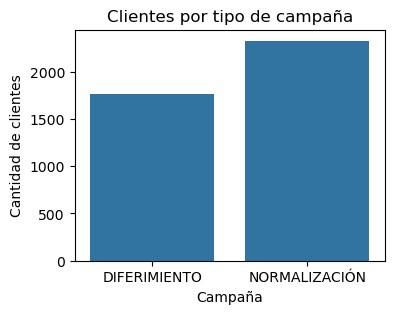

In [17]:
plt.figure(figsize=(4, 3))
sns.countplot(
    data=df_morosidad,
    x="tipo_campania"
)

plt.title("Clientes por tipo de campaña")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Campaña")
plt.show()

### Análisis por Canal de Gestión

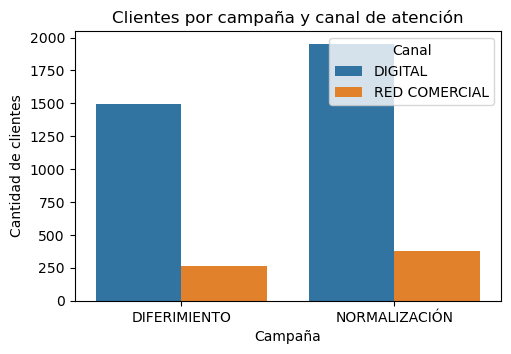

In [18]:
plt.figure(figsize=(5.5, 3.5))

sns.countplot(
    data=df_morosidad,
    x="tipo_campania",
    hue="gestor"
)

plt.title("Clientes por campaña y canal de atención")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Campaña")
plt.legend(title="Canal")
plt.show()

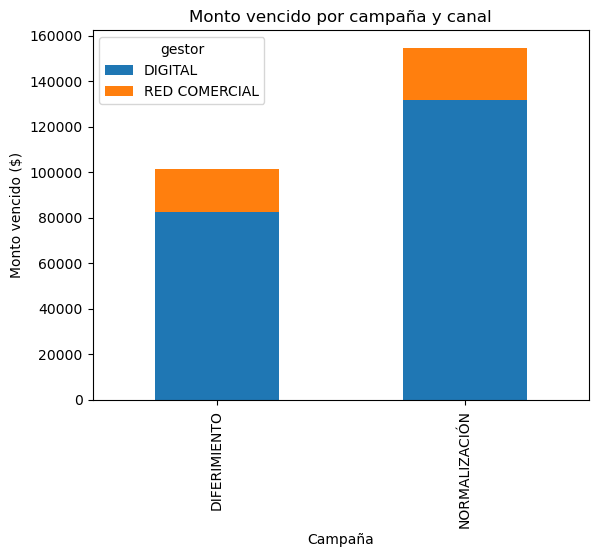

In [19]:
pivot = df_morosidad.groupby(["tipo_campania", "gestor"], observed=True) \
["monto_vencido"].sum().unstack()
pivot.plot(kind="bar", stacked=True)
plt.title("Monto vencido por campaña y canal")
plt.ylabel("Monto vencido ($)")
plt.xlabel("Campaña")
plt.show()

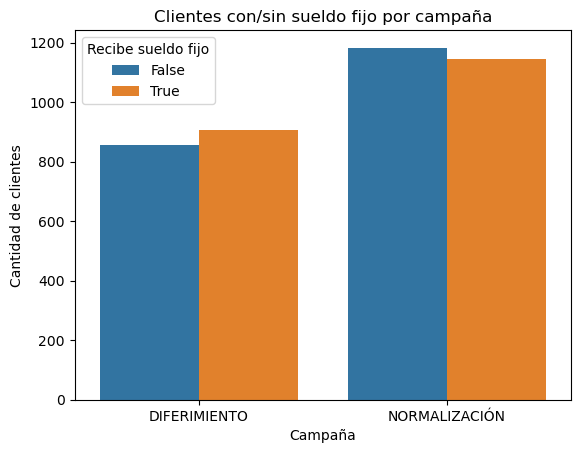

In [20]:
sns.countplot(
    data=df_morosidad,
    x="tipo_campania",
    hue="recibe_sueldo_fijo"
)
plt.title("Clientes con/sin sueldo fijo por campaña")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Campaña")
plt.legend(title="Recibe sueldo fijo")
plt.show()

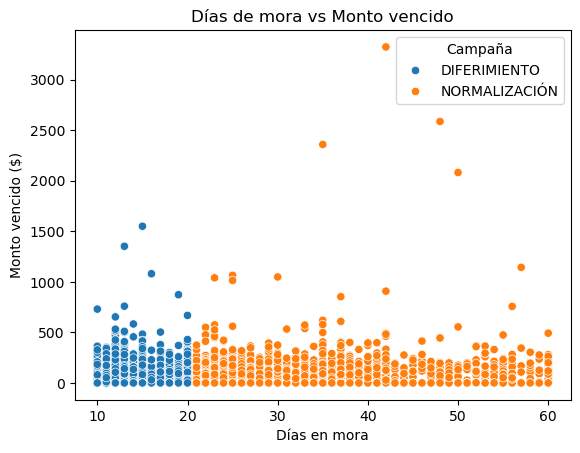

In [21]:
sns.scatterplot(data=df_morosidad, x="dias_mora", y="monto_vencido", hue="tipo_campania")
plt.title("Días de mora vs Monto vencido")
plt.xlabel("Días en mora")
plt.ylabel("Monto vencido ($)")
plt.legend(title="Campaña")
plt.show()

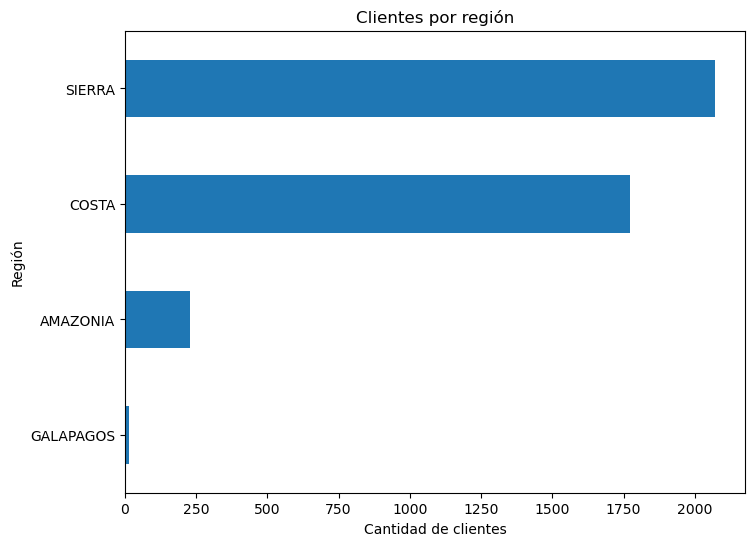

In [22]:
provincia_counts = df_morosidad["region"].value_counts().sort_values()
provincia_counts.plot(kind="barh", figsize=(8,6))
plt.title("Clientes por región")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Región")
plt.show()

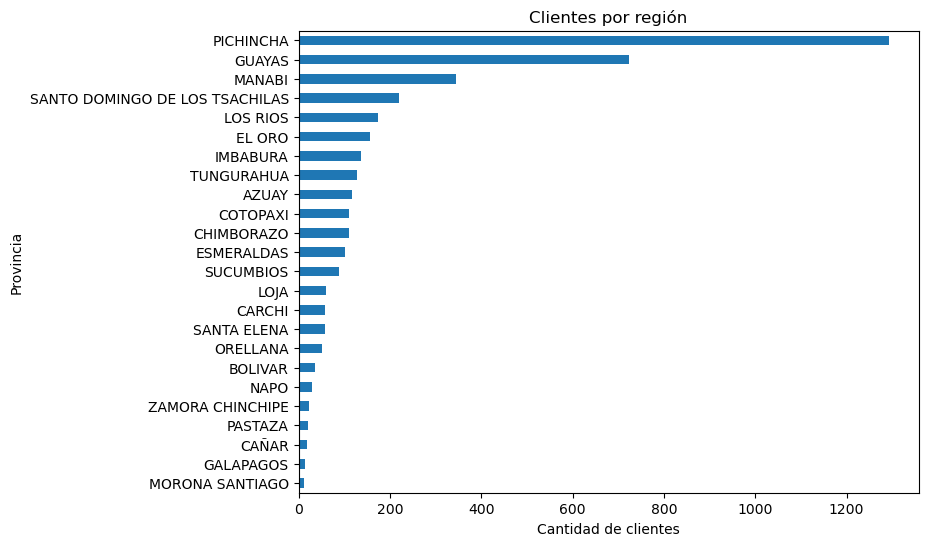

In [23]:
provincia_counts = df_morosidad["provincia_cliente"].value_counts().sort_values()
provincia_counts.plot(kind="barh", figsize=(8,6))
plt.title("Clientes por región")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Provincia")
plt.show()

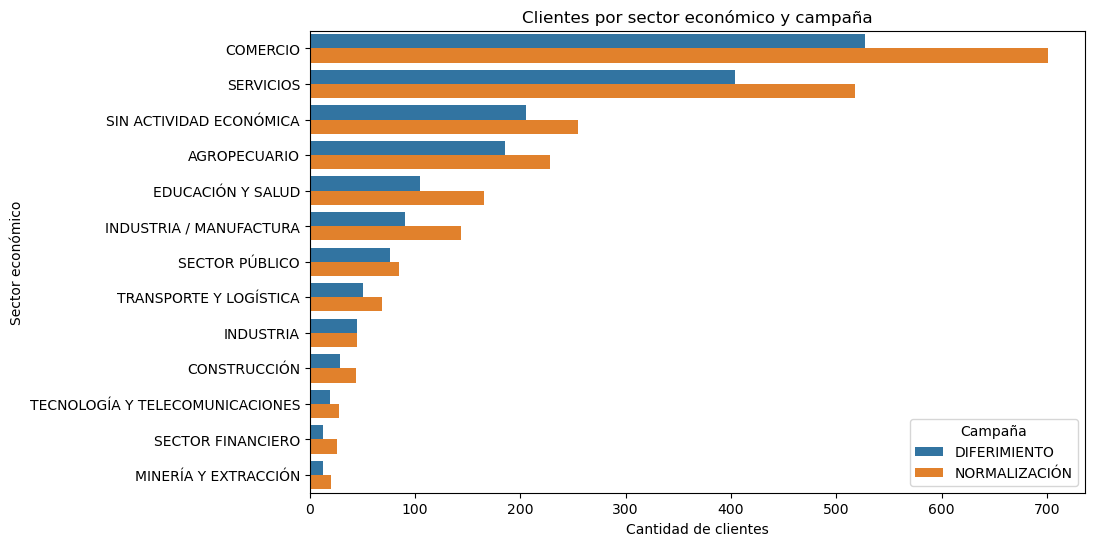

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df_morosidad,
    y="sector_general",
    hue="tipo_campania",
    order=df_morosidad["sector_general"].value_counts().index
)
plt.title("Clientes por sector económico y campaña")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Sector económico")
plt.legend(title="Campaña")
plt.show()

In [25]:
print("Total de clientes:", len(df_morosidad))
print("Total monto vencido: $", df_morosidad["monto_vencido"].sum())
print("Total intereses acumulados: $", df_morosidad["intereses"].sum())
print("Clientes con sueldo fijo:", df_morosidad[df_morosidad["recibe_sueldo_fijo"] == True].shape[0])

Total de clientes: 4090
Total monto vencido: $ 256194.94999999998
Total intereses acumulados: $ 675873.39
Clientes con sueldo fijo: 2050
